In [11]:
from fiona import open
import rasterio
import rasterio.mask
import os
from osgeo import gdal, ogr

#If need to mask a broader area first (for ridge palsa), set true
broadMask = False

# Specify input and output directories
path_to_input = 'C:/PhD/Courses/NGEO306/input/'
path_to_output = 'C:/PhD/Courses/NGEO306/output/'

# Define input raster and shapefile layers
input_raster_name = 'Ridge60m_2022_CSF_Ground'
input_broadClip_name = 'RidgeBroadOutline'
input_Clip_name = 'ridge_2022_2m_vol_outline'

input_Clip= (input_Clip_name + ".shp")
input_raster = (input_raster_name + ".tif")

if broadMask == True:
    input_broadClip = (input_broadClip_name + ".shp")
    output_name = (input_raster_name + "_MaskedBroad.tif")

    #Open and mask the raster
    with fiona.open(path_to_input + input_broadClip, "r") as shapefile:
        shapes = [feature["geometry"] for feature in shapefile]

    with rasterio.open(path_to_input + input_raster) as src:
        out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
        out_meta = src.meta

    out_meta.update({"driver": "GTiff",
                    "height": out_image.shape[1],
                    "width": out_image.shape[2],
                    "transform": out_transform})

    with rasterio.open(path_to_output + output_name, "w", **out_meta) as dest:
        dest.write(out_image)


#Now mask by volume outline
output_name = (input_raster_name + "_Masked.tif")

#Open and mask the raster
with fiona.open(path_to_input + input_Clip, "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

with rasterio.open(path_to_input + input_raster) as src:
    out_image, out_transform = rasterio.mask.mask(src, shapes, crop=True)
    out_meta = src.meta

out_meta.update({"driver": "GTiff",
                "height": out_image.shape[1],
                "width": out_image.shape[2],
                "transform": out_transform})

with rasterio.open(path_to_output + output_name, "w", **out_meta) as dest:
    dest.write(out_image)


ImportError: cannot import name compat

477.7784876743897


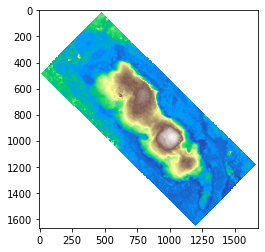

In [12]:
#Visualize rasters
from rasterio.plot import show
import matplotlib.pyplot as plt
from osgeo import gdal
import numpy as np

# Define the path to the masked raster
ds = gdal.Open('C:/PhD/Courses/NGEO306/output/Ridge60m_2022_CSF_Ground_Masked.tif')
band = ds.GetRasterBand(1)
array = band.ReadAsArray()
array[array > 500] = np.nan
array_valid = array[~np.isnan(array)]


plt.imshow(array, cmap='terrain')

print(np.mean(array_valid))

In [38]:
ds.RasterCount

1